# Victor Manuel Gómez Espinosa
## Ciencia de datos, Tarea 5, Problema 1 a) Algoritmo Perceptron

In [1]:
# librerias necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%% DATOS

X, y = make_blobs(
   n_samples=100, n_features=2, centers=2, cluster_std=0.8, shuffle=True, random_state=2
)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)

# cambiamos las etiquetas 0 por -1
Y=y
Y[Y==0]=-1
y=Y


In [3]:
def step(x,y,LearnRate=1): #paso
    dbeta=-y*x #derivadas parciales
    dbeta0=-y
    
    J=np.array([dbeta,
               dbeta0]) #jacobiano
    
    Step=-LearnRate*J #step
    
    return(Step)



def UpdateBetas(x,y,betas,LearnRate=1): # actualiza las betas
    beta,beta0=betas
    Step= step(x,y,LearnRate=LearnRate)
    Newbeta, Newbeta0 = Step
    beta += Newbeta
    beta0 += Newbeta0
    betas=np.array([beta,beta0])
    return(betas,Step)

def PerceptronTransform(X,betas): #obtiene las predicciones
    beta,beta0=betas
    y_pred=(X@beta)+beta0 #distancias al plano
    
    #etiquetamos
    y_pred[y_pred>=0]=1
    y_pred[y_pred<0]=-1
    return(y_pred)


def PerceptronFit(X,y,LearnRate=1,tol=(0.1/100), MaxIter=1000): #ajusta el modelo (encontrar las betas)
    #inicializamos
    n,p=X.shape
    beta=np.zeros(p)
    beta0=0
    betas=np.array([beta,beta0])
    y_obs=y
    y_pred=PerceptronTransform(X,betas) #obtenemos las predicciones iniciales
    
    
    stepDet=100
    j=0
    while (tol<stepDet) and (j<=MaxIter): #Steepest descent
        i=0
        while(i<n) and (tol<stepDet):
        #for i in range(n): #reccorre las observaciones y checa si hay mal clasificados
            x=X[i,:]
            y_obsi=y_obs[i]
            y_predi=y_pred[i] #prediccion

            if(y_predi!=y_obsi): #si esta mal clasificado, actualizamos las betas
                betas,Step=UpdateBetas(x,y_obsi,betas, LearnRate=LearnRate) #actualiza betas
                y_pred=PerceptronTransform(X,betas) #actualiza las predicciones
                Step1, Step0=Step
                a,b =Step1, np.array([Step0])
                StepV=np.concatenate((a,b))
                stepDet=np.linalg.norm(StepV)
            i+=1
                
        
        j+=1
            
    return(betas)

In [4]:
#conjuntos de prueba y entrenamiento
X_train, y_train= X, y
X_test, y_test=X,y

In [5]:
betas=PerceptronFit(X_train, y_train,LearnRate=1,tol=1e-14,MaxIter=100) #ajustamos el modelo
y_pred=PerceptronTransform(X_test,betas) #obtenemos las predicciones

In [6]:
# regresamos a la etiqueta original
d=y_pred
l=d
l[l>=0]=1
l[l<0]=0
data_toy = pd.DataFrame(data_toy).assign(clas = l)

In [7]:
#linea divisora
def f0(x1,b0,b): 
    x2=(b0+b[0]*x1)/-b[1]
    return(x2)
beta,beta0=betas
prediction_space = np.linspace(min(X[:,0]), max(X[:,0])).reshape(-1,1)
x2=f0(prediction_space,beta0,beta)

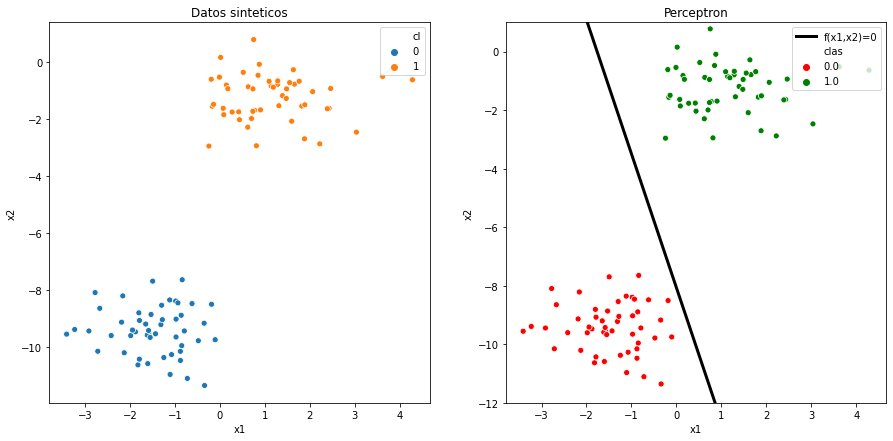

In [8]:
#grafico
fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Datos sinteticos')
sns.scatterplot(x='x1', y='x2', data = data_toy, hue='cl')

fig.add_subplot(122)
custom_palette = ["red", "green"]
sns.scatterplot(x='x1', y='x2', data = data_toy, hue='clas', palette = custom_palette)

plt.plot(prediction_space, x2, color='black', linewidth=3, label='f(x1,x2)=0')
plt.ylim([-12,1])
plt.legend(loc='upper right')

plt.title('Perceptron')
plt.show()